# Expe‍riment 4: practice 4.5.5
***

## Importing Libraries

In [1]:
import math
import random
import numpy as np
import pandas as pd
from numpy import dot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import dist

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Load dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
shape = dataset.shape
print ("Dataset Shape: ", shape)

Dataset Shape:  (200, 5)


## Info of Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#number of null values in each column
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature Engineering

In [7]:
dataset= dataset.iloc[:, [3,4]].values
dataset

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Scaling

In [8]:
scaler = StandardScaler()

In [9]:
data = scaler.fit_transform(dataset)

## K-means

In [10]:
def distance(point, data):
  return np.sqrt(np.sum((point - data) ** 2, axis=1))

In [11]:
class KMeans:
    def __init__(self, n_clusters, max_iter, seed=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.rand = random.Random(seed)
    
    def fit(self, X):
        self.centroids = [self.rand.choice(X)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([distance(centroid, X) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
            self.centroids += [X[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = distance(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
    def loss(self , X, centroids, centroid_idxs):
        cluster_errors = [0 for _ in range(self.n_clusters)]
        for i, x in enumerate(X):
            cluster_errors[centroid_idxs[i]] += dist(centroids[i] , x)
        for i in range(self.n_clusters):
            cluster_errors[i] /= centroid_idxs.count(i)
        return np.mean(cluster_errors)

1 1.197935444974564
2 1.056069540893105
3 0.6980664056359857
4 0.6189966315823547
5 0.5508655253419178
6 0.49992202120379686
7 0.4503303591356107
8 0.4564629006500581
9 0.3689828725422516
10 0.36899468543941616
11 0.3342832414532061
12 0.3204020583709017
13 0.30505467312498746
14 0.2850111699587298
15 0.2965944417294393


Text(0, 0.5, 'Error')

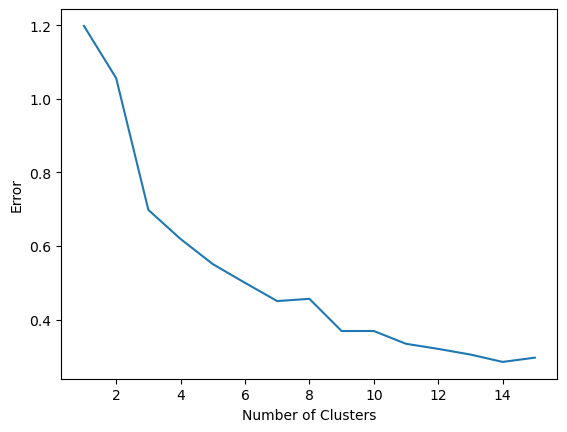

In [12]:
errors = []
for i in range(1 , 16):
    k = i
    clf = KMeans(k, 300)
    clf.fit(data)
    centers, classification = clf.evaluate(data)
    error = clf.loss(data , centers, classification)
    print(i , error)
    errors.append(error)
fig, ax = plt.subplots()
ax.plot(np.arange(1 , 16), errors)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Error")

In [13]:
clf = KMeans(6, 300)
clf.fit(data)
centers, classification = clf.evaluate(data)

In [14]:
clusters = np.array(classification)
clusters

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 2, 5, 3, 5, 2, 5, 2, 5,
       3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
np.array(np.unique(clusters, return_counts=True))

array([[ 0,  1,  2,  3,  4,  5],
       [23, 11, 35, 81, 22, 28]])

In [16]:
X = data

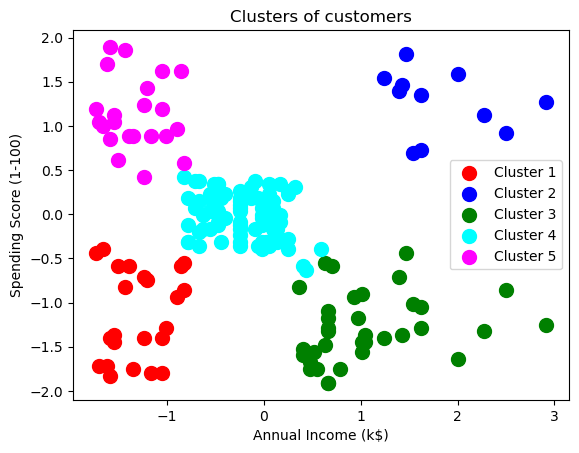

In [17]:
#Visualizing all the clusters 

plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [1]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less